In [126]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib as plt
import tensorflow as tf
import datetime
data = pd.read_csv("C:/Users/GSE/suicide/Bike/Bike_csv/bike_1(2018).csv",encoding='CP949')

#data = bike_data.fillna(0)

data = data.drop(["20"],axis=1)
data = data.drop(["bike_table"],axis=1)
data = data.drop(["recent"],axis=1)
data = data.drop(["bike_name"],axis=1)
#data2015.to_csv("CSV파일/2015_val.csv",header=True,index=False)
data = data.drop(["Date"],axis=1)
data = data.drop(["Time"],axis=1)
data = data.drop(["nike_name"],axis=1)

In [127]:
data.head()
# 이 컬럼에 날짜(datetime) 컬럼의 dt(datetime의 약자입니다) 옵션을 활용하여 연월일시분초를 따로 넣어줍니다.
data["datetime-year"] = data["data_time"].dt.year
data["datetime-month"] = data["data_time"].dt.month
data["datetime-day"] = data["data_time"].dt.day
data["datetime-hour"] = data["data_time"].dt.hour
data["datetime-minute"] = data["data_time"].dt.minute
data["datetime-second"] = data["data_time"].dt.second

,data_time,browe,rate,Day
0,2018-01-01 0:08,-1,19,1
1,2018-01-01 0:20,0,19,1
2,2018-01-01 0:24,0,19,1
3,2018-01-01 0:27,1,20,1
4,2018-01-01 0:38,0,20,1


In [134]:
# 하이퍼파라미터
input_data_column_cnt = 2  # 입력데이터의 컬럼 개수(Variable 개수)
output_data_column_cnt = 1 # 결과데이터의 컬럼 개수
 
seq_length = 28            # 1개 시퀀스의 길이(시계열데이터 입력 개수)
rnn_cell_hidden_dim = 20   # 각 셀의 (hidden)출력 크기
forget_bias = 1.0          # 망각편향(기본값 1.0)
num_stacked_layers = 1     # stacked LSTM layers 개수
keep_prob = 1.0            # dropout할 때 keep할 비율
 
epoch_num = 100           # 에폭 횟수(학습용전체데이터를 몇 회 반복해서 학습할 것인가 입력)
learning_rate = 0.01       # 학습률


In [ ]:
dataX = [] # 입력으로 사용될 Sequence Data
dataY = [] # 출력(타켓)으로 사용

In [ ]:
for i in range(0, len(y) - seq_length):
    _x = x[i : i+seq_length]
    _y = y[i + seq_length] # 다음 나타날 주가(정답)
    if i is 0:
        print(_x, "->", _y) # 첫번째 행만 출력해 봄
    dataX.append(_x) # dataX 리스트에 추가
    dataY.append(_y) # dataY 리스트에 추가
[출처] [Tensorflow] LSTM RNN을 이용하여 아마존 주가 예측하기|작성자 똑똑이

In [129]:
# Index 설정
data['data_time']
data = data.set_index(['data_time'])
data.index = pd.to_datetime(data.index)

In [130]:
# x값 y값 으로 나눈다 .y값이 결과 값

x = data.drop(["rate"], axis=1)
y = data["rate"].astype(int)
#x.set_index(x['data_time'])

In [131]:
# Standardization
def data_standardization(x):
    x_np = np.asarray(x)
    return (x_np - x_np.mean()) / x_np.std()
# min_max_scaling
def min_max_scaling(x):
    x_np = np.asarray(x)
    return (x_np - x_np.min()) / (x_np.max() - x_np.min() + 1e-7) # 1e-7은 0으로 나누는 오류 예방차원
 

In [133]:
import numpy as np
train_size = int(len(y)* 0.8)
test_size = len(y)- train_size
print(train_size,",",test_size)
#####################################
# train, test 나누기#
##########################33
#split to train and testing

train_x, test_x = np.array(x[0:train_size]),np.array(x[train_size:len(x)])
train_y, test_y = np.array(y[0:train_size]),np.array(y[train_size:len(y)])

19324 , 4832


In [32]:
# input placeholders
import tensorflow as tf

timesteps = seq_length = 16909 # 몇일간의 데이터를 갖고 있는지
data_dim = 1 # 변수가 몇개인지
output_dim = 1
#tf.reset_default_graph()
#with tf.name_scope('scope_alpha'):
pl_X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
pl_Y = tf.placeholder(tf.float32, [None, 1])

In [33]:
dataX = [] # 입력으로 사용될 Sequence Data
dataY = [] # 출력(타켓)으로 사용
# 검증용 측정지표를 산출하기 위한 targets, predictions를 생성한다
targets = tf.placeholder(tf.float32, [None, 1])
print("targets: ", targets)


targets:  Tensor("Placeholder_5:0", shape=(?, 1), dtype=float32)


In [34]:
forget_bias = 1.0          # 망각편향(기본값 1.0)
num_stacked_layers = 1     # stacked LSTM layers 개수
keep_prob = 1.0            # dropout할 때 keep할 비율
epoch_num = 1000           # 에폭 횟수(학습용전체데이터를 몇 회 반복해서 학습할 것인가 입력)
learning_rate = 0.01       # 학습률
output_data_column_cnt = 1 # 결과데이터의 컬럼 개수


In [11]:
def lstm_cell():
    # LSTM셀을 생성
    # num_units: 각 Cell 출력 크기
    # forget_bias:  to the biases of the forget gate 
    #              (default: 1)  in order to reduce the scale of forgetting in the beginning of the training.
    # state_is_tuple: True ==> accepted and returned states are 2-tuples of the c_state and m_state.
    # state_is_tuple: False ==> they are concatenated along the column axis.
    cell = tf.contrib.rnn.BasicLSTMCell(num_units= 5, 
                                        forget_bias=forget_bias, state_is_tuple=True, activation=tf.nn.softsign)
    if keep_prob < 1.0:
        cell = tf.contrib.rnn.DropoutWrapper(cell, output_keep_prob=keep_prob)
    return cell

In [12]:
# num_stacked_layers개의 층으로 쌓인 Stacked RNNs 생성
stackedRNNs = [lstm_cell() for _ in range(num_stacked_layers)]
multi_cells = tf.contrib.rnn.MultiRNNCell(stackedRNNs, state_is_tuple=True) if num_stacked_layers > 1 else lstm_cell()
 
# RNN Cell(여기서는 LSTM셀임)들을 연결
hypothesis, _states = tf.nn.dynamic_rnn(multi_cells, pl_X, dtype=tf.float32)
print("hypothesis: ", hypothesis)
 
# [:, -1]를 잘 살펴보자. LSTM RNN의 마지막 (hidden)출력만을 사용했다.
# 과거 여러 거래일의 주가를 이용해서 다음날의 주가 1개를 예측하기때문에 MANY-TO-ONE형태이다
hypothesis = tf.contrib.layers.fully_connected(hypothesis[:, -1], output_data_column_cnt, activation_fn=tf.identity)
 
 

W1110 14:00:53.259816 13204 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1110 14:00:53.261810 13204 deprecation.py:323] From <ipython-input-11-3aa89b79a339>:9: BasicLSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
W1110 14:00:53.263805 13204 deprecation.py:323] From <ipython-input-12-ef5b29210808>:6: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`

hypothesis:  Tensor("rnn/transpose_1:0", shape=(?, 16909, 5), dtype=float32)


In [8]:
#rnn출력을 Fully connected를 한 번 더 거쳐 출력해주겠다. 
#이때 몇개로 펼쳐줄지는 hidden_dim에 값을 넣어서 조정해준다.
# num_units=hidden_dim 어떤 값이든 상관없는지 ?
#tf.reset_default_graph() 
#with tf.Graph().as_default():
cell = tf.contrib.rnn.BasicLSTMCell(num_units=5, state_is_tuple=True)
outputs, _states = tf.nn.dynamic_rnn(cell, pl_X, dtype = tf.float32)
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], output_dim, activation_fn=None) 
    # We use the last cell's output. 
    # 예를들어 1일차부터 7일차까지 출력을 다 쓰는게 아니라 7일까지 모은 데이터의 출력을 쓰는 것이므로

# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - pl_Y)) # sum of the squares
# optimizer
#optimizer = tf.optimizers.Adam(0.01)
#train = optimizer.

W1110 10:54:31.394746  6520 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1110 10:54:31.395745  6520 deprecation.py:323] From <ipython-input-8-3229bcec0a76>:6: BasicLSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
W1110 10:54:31.395745  6520 deprecation.py:323] From <ipython-input-8-3229bcec0a76>:7: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, 

In [9]:
# optimizer
#optimizer = tf.keras.optimizers.*
optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
print(x['data_time'])
plot_x = x['data_time']
plot_y = y
plt.plot(plot_x, plot_y)
plt.show()

0        '2018-01-01 00:08:23'
1        '2018-01-01 00:20:37'
2        '2018-01-01 00:24:14'
3        '2018-01-01 00:27:47'
4        '2018-01-01 00:38:46'
                 ...          
24151    '2018-04-01 00:10:35'
24152    '2018-04-01 00:16:10'
24153    '2018-04-01 00:19:03'
24154    '2018-04-01 00:19:03'
24155    '2018-04-01 00:32:01'
Name: data_time, Length: 24156, dtype: object


In [ ]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
"""
# 데이터셋 전처리
train_x = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
"""
look_back = 40


In [90]:
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))


In [91]:
train_x

array([[[-1,  1]],

       [[ 0,  1]],

       [[ 0,  1]],

       ...,

       [[ 0,  6]],

       [[ 1,  6]],

       [[-1,  6]]], dtype=int64)

In [92]:
train_y

array([19, 19, 19, ..., 23, 24, 23])

In [94]:
# 2. 모델 구성하기

model = Sequential()
model.add(LSTM(32, input_shape=(1, 2)))# input shape 중요 잘 맞쳐줘야한다
model.add(Dropout(0.3))
model.add(Dense(1))
# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')


In [95]:
data.info(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24156 entries, 2018-01-01 00:08:00 to 2018-04-01 00:32:00
Data columns (total 3 columns):
browe    24156 non-null int64
rate     24156 non-null int64
Day      24156 non-null int64
dtypes: int64(3)
memory usage: 1.4 MB


In [123]:








# 4. 모델 학습시키기
hist = model.fit( train_x,train_y, epochs=200, batch_size=32)

#, validation_data=(x_val, y_val)
# 5. 학습과정 살펴보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 6. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)


ValueError: Error when checking input: expected lstm_11_input to have 3 dimensions, but got array with shape (19324, 2)

KeyError: 'val_loss'

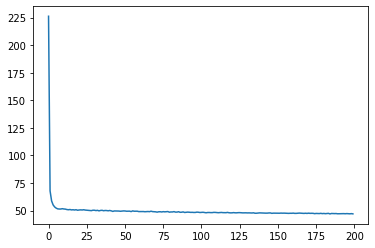

In [124]:
import matplotlib as plt
import matplotlib as plt
import matplotlib.pyplot as plt
#, validation_data=(x_val, y_val)
# 5. 학습과정 살펴보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [125]:

# 7. 모델 사용하기
look_ahead = 250
xhat = test_x[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()

('Train Score: ', 7.4928388073060068e-05)
('Validataion Score: ', 7.4891158146783712e-05)
('Test Score: ', 7.4891158146783712e-05)



ValueError: Error when checking input: expected lstm_11_input to have 3 dimensions, but got array with shape (1, 2)

In [113]:
test_x[0]

array([[1, 6]], dtype=int64)